In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [3]:
TRAIN_PATH = '../input/fruits-fresh-and-rotten-for-classification/dataset/train/'
TEST_PATH = '../input/fruits-fresh-and-rotten-for-classification/dataset/test/'
SIZE = (240, 240)

In [4]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


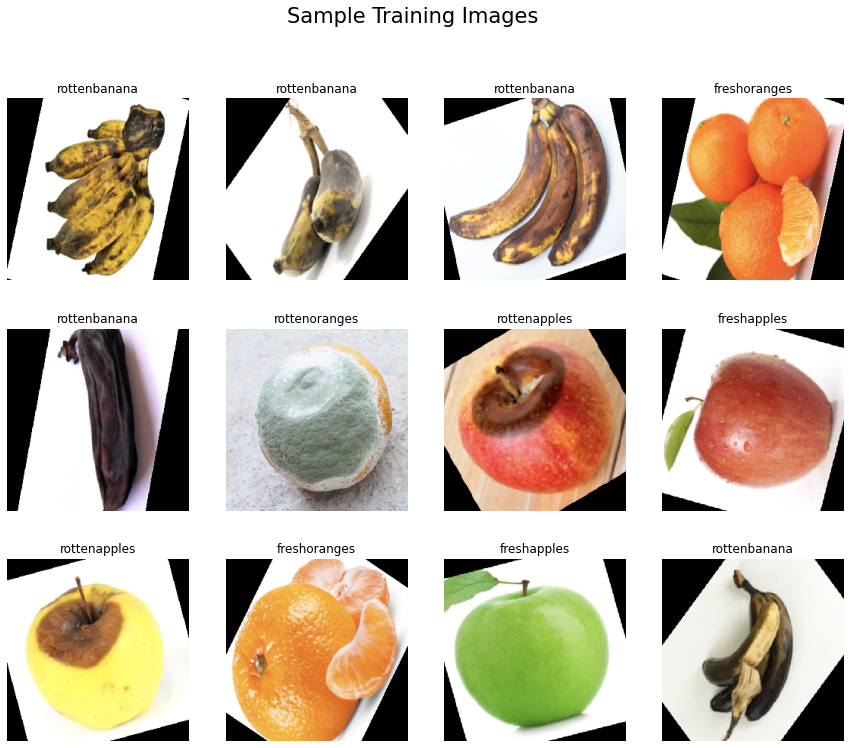

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

2022-12-13 04:55:40.703609: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

In [9]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-13 04:55:41.077122: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12
307/307 [==============================] - 492s 2s/step - loss: 0.9819 - accuracy: 0.6434 - val_loss: 0.4597 - val_accuracy: 0.8244
Epoch 2/12
307/307 [==============================] - 498s 2s/step - loss: 0.3209 - accuracy: 0.8856 - val_loss: 0.3312 - val_accuracy: 0.8805
Epoch 3/12
307/307 [==============================] - 491s 2s/step - loss: 0.2077 - accuracy: 0.9229 - val_loss: 0.1574 - val_accuracy: 0.9504
Epoch 4/12
307/307 [==============================] - 503s 2s/step - loss: 0.1647 - accuracy: 0.9403 - val_loss: 0.1345 - val_accuracy: 0.9531
Epoch 5/12
307/307 [==============================] - 495s 2s/step - loss: 0.1207 - accuracy: 0.9571 - val_loss: 0.1242 - val_accuracy: 0.9568
Epoch 6/12
307/307 [==============================] - 490s 2s/step - loss: 0.1089 - accuracy: 0.9616 - val_loss: 0.0888 - val_accuracy: 0.9761
Epoch 7/12
307/307 [==============================] - 485s 2s/step - loss: 0.0919 - accuracy: 0.9675 - val_loss: 0.1529 - val_accuracy: 0.9540

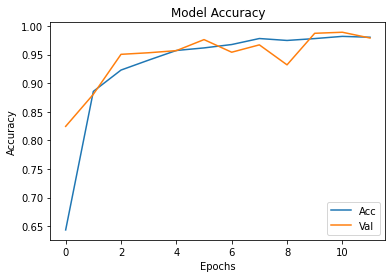

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

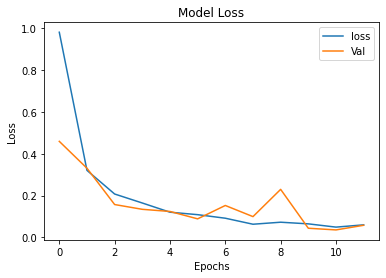

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [12]:
# learning_rate = history.history['lr']
# plt.plot(history.history['lr'])
# plt.title('Learning Rate')
# plt.xlabel('Epochs')
# plt.ylabel('Learning Rate')
# plt.legend(['loss','Val'], loc = 'upper right')

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 64s 24ms/step - loss: 0.1103 - accuracy: 0.9607
accuracy test:  0.960711658000946
loss test:  0.11030465364456177


In [14]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
    print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)


for file  rottenbanana/Screen Shot 2018-06-12 at 8.47.41 PM.png  predicted class is  rottenbanana  with probability  0.9999889
for file  rottenbanana/Screen Shot 2018-06-12 at 8.47.51 PM.png  predicted class is  rottenbanana  with probability  0.99998045
for file  rottenbanana/Screen Shot 2018-06-12 at 8.48.40 PM.png  predicted class is  rottenbanana  with probability  0.9999695
for file  rottenbanana/Screen Shot 2018-06-12 at 8.49.25 PM.png  predicted class is  rottenbanana  with probability  0.9994955
for file  rottenbanana/Screen Shot 2018-06-12 at 8.49.41 PM.png  predicted class is  rottenbanana  with probability  0.9987293
for file  rottenbanana/Screen Shot 2018-06-12 at 8.51.00 PM.png  predicted class is  rottenbanana  with probability  0.9999809
for file  rottenbanana/Screen Shot 2018-06-12 at 8.51.46 PM.png  predicted class is  rottenbanana  with probability  1.0
for file  rottenbanana/Screen Shot 2018-06-12 at 8.52.16 PM.png  predicted class is  rottenbanana  with probability 

In [15]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 6)


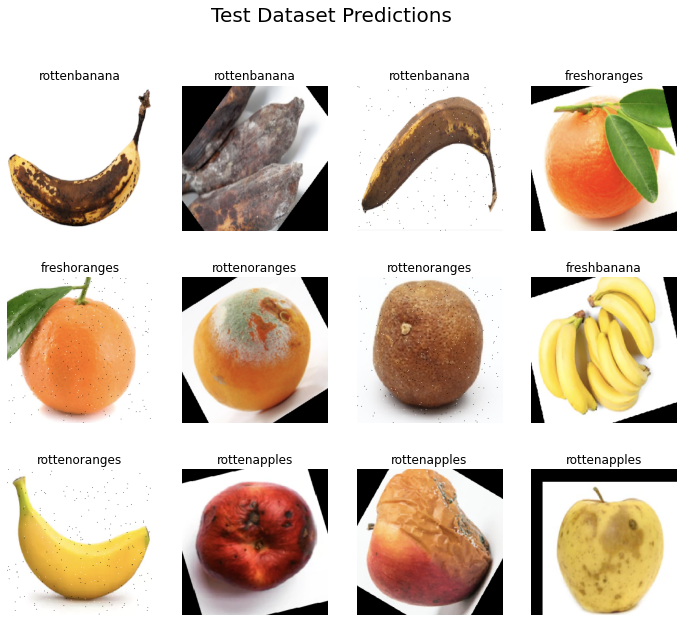

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

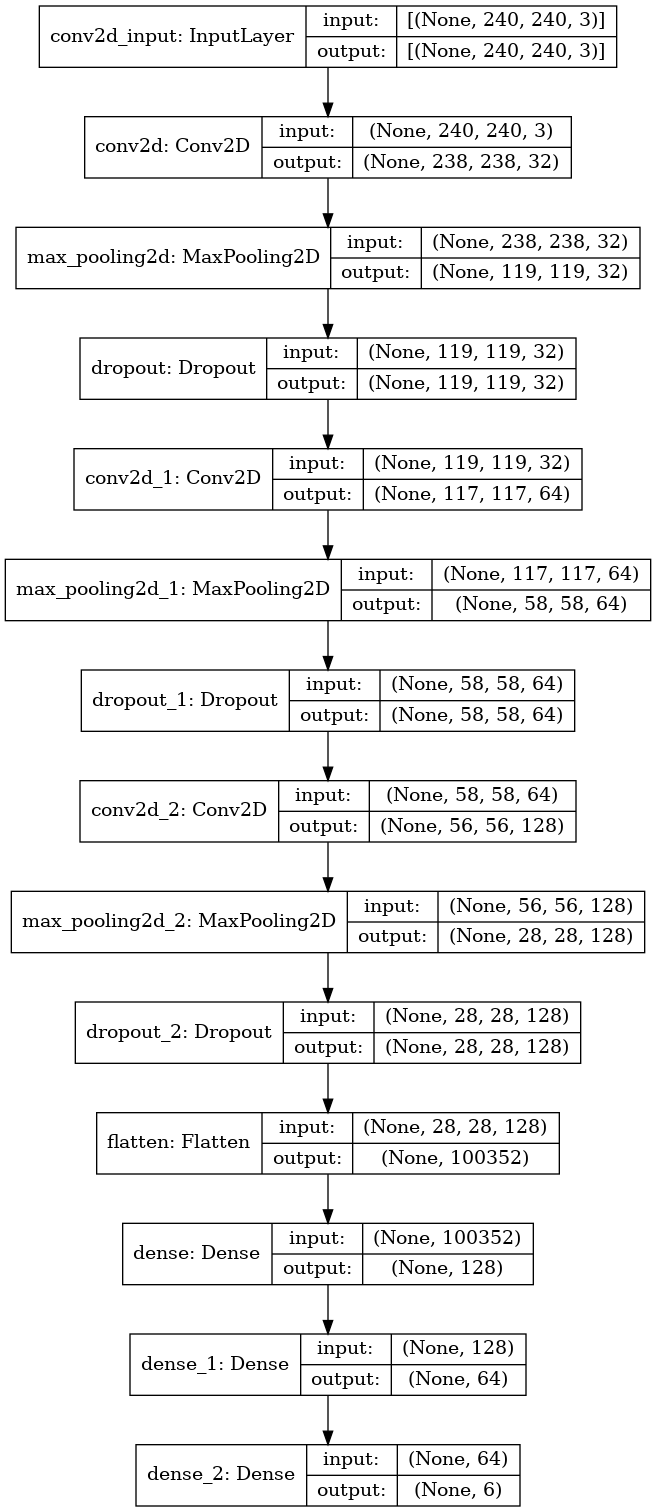

In [17]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [26]:
model.save('Modelv1.h5')